In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Simulation parameters
dt = 0.04  # time step
t_max = 1400  # maximum simulation time

In [3]:
# Arrays to store the time
t_values = np.arange(0, t_max, dt)

In [4]:
# Constants
M_1 = 1.989e30  # mass of Sun
M_2 = 5.972e24  # mass of Earth

In [5]:
# Reducing 3 Body Problem
u = M_2/(M_1+M_2)

# Coordinates and Masses in the new, rotating coordinate frames
u_1 = 1-u
r_1 = np.array([-u,0])
u_2 = u
r_2 = np.array([1-u,0])

In [6]:
# Initial parameters for Tadpole orbit
r_inital = 1.0006
theta_inital = (50)*(np.pi/180)
r_0  = np.array([r_inital*np.cos(theta_inital), r_inital*np.sin(theta_inital)])  # initial position
v_0 = np.array([0, 0])  # initial velocity

In [7]:
# Lagranian points L4 and L5
r_L4 = np.array([(0.5),(0.5)*(3)**(0.5)])
r_L5 = np.array([(0.5),-(0.5)*(3)**(0.5)])

In [8]:
# Arrays to store trajectory
r_values = np.zeros((len(t_values), 2))
v_values = np.zeros((len(t_values), 2))
E_values = np.zeros((len(t_values), 2))

In [9]:
# Setting the conditions into arrays
r_values[0,:] = r_0
v_values[0,:] = v_0

In a reduced 3 body system like this one, the 2 massive bodies, since being unaffected by the 3rd body, just revolve each other, making it desireable to work in a rotating frame to process and visualise data easily. This changes the expression of acceleration and introduces additional pseudo accelerations which we need to take care of. The acceleration equation then becomes:

a_x = 2 * v_y + x - u_1 * (x + u_2)/|r - r_1|^3 - u_2 * (x - u_1)/|r - r_2|^3

a_y = -2 * v_x + y - u_1 * y/|r - r_1|^3 - u_2 * y/|r - r_2|^3

In [10]:
def a(r,v):
    R_1 = np.linalg.norm(r-r_1)
    R_2 = np.linalg.norm(r-r_2)
    a_x = 2*v[1] + r[0] - u_1*(r[0]+u_2)/R_1**3 - u_2*(r[0]-u_1)/R_2**3
    a_y = -2*v[0] + r[1] - u_1*(r[1])/R_1**3 - u_2*(r[1])/R_2**3
    return np.array([a_x,a_y])

In [11]:
# Euler Richardson Numerical integration loop
for i in range(0,len(t_values)-1):
    v_mid = v_values[i,:]+0.5*a(r_values[i,:],v_values[i,:])*dt
    r_mid = r_values[i,:]+0.5*v_values[i,:]*dt
    v_values[i+1,:] = v_values[i,:]+a(r_mid,v_mid)*dt
    r_values[i+1,:] = r_values[i,:]+v_mid*dt

#for i in range(0,len(t_values)):
#    E_values[i]= m*(0.5*(np.linalg.norm(v_richardson_values[i,:]))**2 - G*M/(np.linalg.norm(x_richardson_values[i,:])))

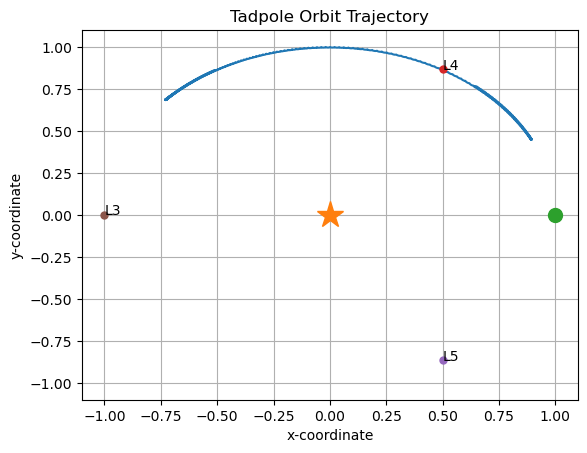

In [12]:
# Plotting the trajectory
plt.plot(r_values[:, 0], r_values[:, 1])
plt.plot(0, 0, marker='*', ls='none', ms=20)
plt.plot(1, 0, marker='.', ls='none', ms=20)
plt.plot(0.5, (0.5)*(3)**(0.5), marker='.', ls='none', ms=10)
plt.plot(0.5, -(0.5)*(3)**(0.5), marker='.', ls='none', ms=10)
plt.plot(-1, 0, marker='.', ls='none', ms=10)
plt.text(-1,0,'L3')
plt.text(0.5,(0.5)*(3)**(0.5),'L4')
plt.text(0.5,-(0.5)*(3)**(0.5),'L5')
plt.title("Tadpole Orbit Trajectory")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.grid(True)
plt.show()

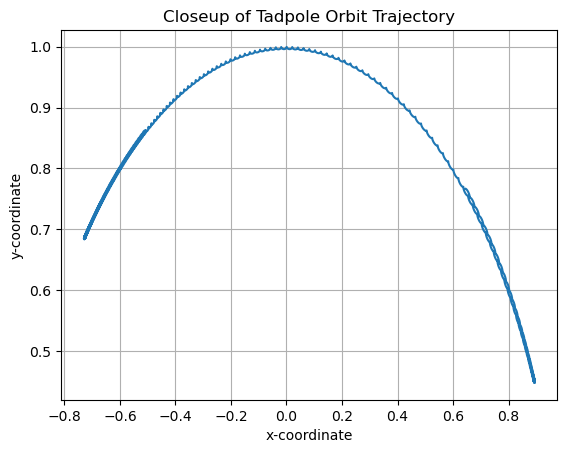

In [13]:
# Closeup of Orbit
plt.plot(r_values[:, 0], r_values[:, 1])
plt.title("Closeup of Tadpole Orbit Trajectory")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.grid(True)
plt.show()